# Ground-state of the Schrödinger Gross Pitaevskii equation

### 1. Launch packages 

In [1]:

import numpy as np
import scipy.fftpack as fftpack
import matplotlib.pyplot as plt
from   scipy import linalg  
from scipy.special import hermite
from matplotlib import colors
import h5py


In [2]:

%pylab inline

# Set labels' font size

plt.rcParams.update({'axes.labelsize': 26 })
plt.rcParams.update({'legend.fontsize': 17 })
plt.rcParams.update({'xtick.labelsize': 15 })
plt.rcParams.update({'ytick.labelsize': 15 })


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### 2. Specify System's Quantum Parameters in atomic units

In [3]:
X_gridDIM    =  256      # Discretization grid size in X 
X_amplitude  =  10       # Window range -X1_amplitude to X1_amplitude
dt           =  0.01     # Time increment
timeSteps    =  500      #Number of iterations
hbar         =  1        # Plank constant
aGP          =  1        # Coupling constant 

timeRange     =  np.array(range(0,timeSteps+1))*dt        
print ' Simulation time = ', np.max(timeRange) ,'(a.u.)'

 Simulation time =  5.0 (a.u.)


### 3. Build discretization resolution & coordinates

In [4]:

#-----Discretization resolution-----

import scipy.fftpack as fftpack

dX =  2.*X_amplitude/float(X_gridDIM)
dK =  2.*np.pi/(2.*X_amplitude)
K_amplitude = dK*X_gridDIM/2.


#-----Vectors with range of coordinates-----

X_range      =  np.linspace(-X_amplitude      , X_amplitude  -dX , X_gridDIM )
K_range      =  np.linspace(-K_amplitude      , K_amplitude  -dK , X_gridDIM)
X            =  fftpack.fftshift( X_range )
K            =  fftpack.fftshift( K_range )

print "Resolution features : "
print ""
print " dX = ",dX  ,"                dK = ",dK
print ""
print " X_amplitude = +-", X_amplitude ,"            K_amplitude = +-", K_amplitude


Resolution features : 

 dX =  0.078125                 dK =  0.314159265359

 X_amplitude = +- 10             K_amplitude = +- 40.2123859659


### 4. Set the Potential and the Kinetic terms

In [5]:

# Parameters in Atomic units (a.u.)

mass = 1
omega = 1


def Potential(x):
    """
    Potential  function   
    """
    return 0.5*mass*omega**2*x**2

            
def dPotentialdx(x):
    """
    dPotential/dx  function   
    """
    return mass*omega**2*x


def Kinetic(k):
    """
    Kinetic Energy function   
    """
    return k**2/(2*mass)


### 4.1 Plot the potential

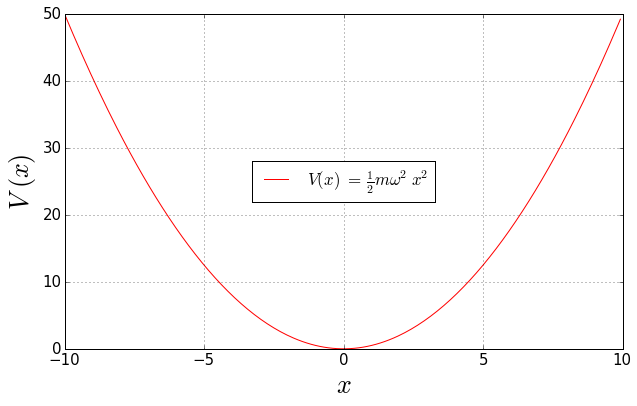

In [6]:

plt.figure(figsize=(10,6))
plt.plot( fftshift(X), Potential(fftshift(X)) ,"r",label = '$V(x) \\ =\\ \\frac{1}{2} m \omega^2 x^2 $' )
xlabel('$x$')
ylabel('$V \\ (x)$')
legend(loc = "center")
grid('on')


### 5. Some plot functions

In [36]:

def Plot_Psi(Psi_x):
    
    """
    Plot the wavefunction in the position and
    momentum spaces.
    """
    # Probability in the position space
    
    rho_x = np.abs(  Psi_x )**2
    
    # Probability in the momentum space
    
    Psi_k  = fftpack.fft(Psi_x)
    
    Psi_k /= linalg.norm(Psi_k)*np.sqrt(dK)
    
    rho_k = np.abs( Psi_k )**2
    
    # Plots
    
    plt.figure(figsize=(20,7))
    
    ax1 = plt.subplot(121)
    
    plt.plot( fftpack.fftshift( X ), fftpack.fftshift( rho_x ) , label ='$|\psi(x , t)|^2 $')  
    
    plt.plot( fftpack.fftshift( X ) , np.real( fftpack.fftshift( Psi_x ) )   , label ='$Re[\psi(x , t)] $')
    
    plt.plot( fftpack.fftshift( X ), np.imag( fftpack.fftshift( Psi_x ) )   ,label = '$Im[\psi(x , t)]$')
    
    plt.xlabel(" $x$")
    
    plt.grid('on')
    
    plt.legend(loc='upper left')


    ax2 = plt.subplot(122)
    
    plt.plot( fftpack.fftshift( K ), fftpack.fftshift(rho_k)  , label ='$|\psi(k , t)|^2 $') 
    
    plt.plot( fftpack.fftshift( K ) , np.real( fftpack.fftshift(Psi_k) )   , label ='$Re[\psi(k , t)] $')
    
    plt.plot( fftpack.fftshift( K ), np.imag( fftpack.fftshift(Psi_k) )   ,label = '$Im[\psi(k , t)]$')
    
    plt.xlim([-10,10])
    
    plt.xlabel(" $k$")
    
    plt.grid('on')
    
    plt.legend(loc='upper left')
    
    return
       

## 6. Propagation
### 6.1 Set the Initial state

In [37]:

def Psi_HarmonicOscillator( hBar, n, mass, omega, X0, P0, X ):

		k = np.sqrt(mass*omega ) 
        
		return np.exp(1j*P0*(X-X0))*np.exp( -0.5*k**2*(X-X0)**2 )*hermite(n)( k*(X-X0) )
    

In [38]:

def Psi_Gaussian( x_init, k_init, s ):
    
    return np.exp(  -0.5  *( ( X-x_init )/s )**2 + 1j*k_init*X  )


In [39]:

# Center of the wave packet

x_init = 1. #  Center of the wave packet

k_init = 0  #  Center of the wave packet in "k" space

s = 1       #  Standart deviation 

n = 0       #  Quantum number

# Initial wave packet in x space 

Psi_init_x = Psi_HarmonicOscillator( hbar, n , mass, omega, x_init , k_init , X )

Psi_init_x /= linalg.norm(Psi_init_x)*np.sqrt(dX) 

rho_init_x = np.abs(  Psi_init_x  )**2

# Initial wave packet in k space 

Psi_init_k  = fftpack.fft(Psi_init_x)

Psi_init_k /= linalg.norm(Psi_init_k)*np.sqrt(dK) 

rho_init_k = np.abs( Psi_init_k )**2

# Print features 

print "Initial state features:"
print ""
print "Energy Average:",np.dot( rho_init_x,Potential(X)  )*dX + np.dot(  rho_init_k ,Kinetic(K)  )*dK + 0.5*aGP*np.sum( rho_init_x**2  )*dX     
print "Psi_init_x renormalization norm :",linalg.norm(Psi_init_x)*np.sqrt(dX)
print "Psi_init_k renormalization norm :",linalg.norm(Psi_init_k)*np.sqrt(dK)


Initial state features:

Energy Average: 1.1994711402
Psi_init_x renormalization norm : 1.0
Psi_init_k renormalization norm : 1.0


### 6.2  Initial state plots

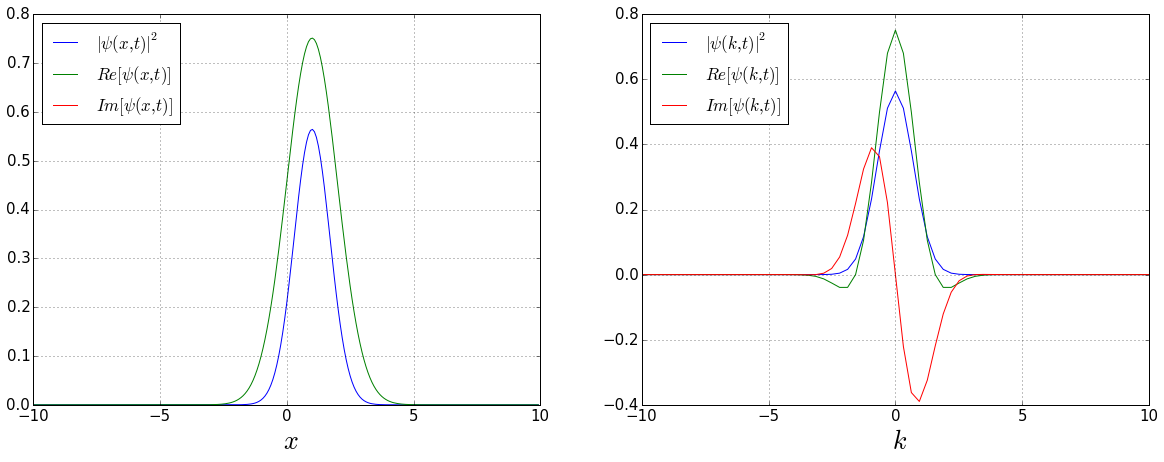

In [40]:

Plot_Psi( Psi_init_x )


### 6.3 Split Operator Method: 2nd Order Scheme

In [41]:

# -----------Propagators factors---------------

#  kinetic propagator 

kineticPropagatorFactor= np.exp(  -1j*dt*Kinetic(K)*hbar  )

#  The potential propagator factor

potentialPropagatorFactor = np.exp(  -1j*(dt/2.)*Potential(X)/hbar  )


In [42]:

# Lists to save expectation values

Psi_x = Psi_init_x.copy()  

data_PsiS= [ Psi_x ]

data_PsiS_k = [ Psi_init_k ]

data_Expectation_X=[ np.dot( rho_init_x , X)*dX ]

data_Expectation_X2=[ np.dot( rho_init_x , X**2)*dX ]

data_Expectation_P=[ np.dot( rho_init_k , K)*dK ]

data_Expectation_P2=[ np.dot( rho_init_k , K**2)*dK ]

data_Expectation_XP=[  -1j*hbar*np.sum( np.conj(Psi_x)*X*np.gradient(Psi_x,dX) )*dX  ]

data_Expectation_PX=[  -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(X*Psi_x,dX) )*dX   ]

#---------------------------------------------------------------------------

data_Expectation_F=[ -1*np.dot( rho_init_x , dPotentialdx(X) )*dX ]

data_Expectation_F_NL =[ -1*np.dot( rho_init_x , np.gradient(aGP*rho_init_x,dX))*dX ]

data_Expectation_XdVdX=[ np.dot( rho_init_x , X*dPotentialdx(X) )*dX ]

data_Expectation_XdVdX_NL =[ np.dot( rho_init_x , X*np.gradient(aGP*rho_init_x,dX) )*dX ]

data_Expectation_PdVdX=[ -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(dPotentialdx(X)*Psi_x,dX) )*dX  ]

data_Expectation_PdVdX_NL = [ -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(aGP*rho_init_x*Psi_x,dX) )*dX  ]

data_Expectation_dVdX_P=[ -1j*hbar*np.sum( np.conj(Psi_x)*dPotentialdx(X)*np.gradient(Psi_x,dX) )*dX  ]

data_Expectation_dVdX_P_NL =[ -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(aGP*rho_init_x,dX)*np.gradient(Psi_x,dX) )*dX ]   

data_Expectation_V=[ np.dot( rho_init_x , Potential(X)  )*dX ]

data_Expectation_V_NL=[ np.dot( rho_init_x , aGP*rho_init_x  )*dX ]

data_Energy= [ np.sum(hbar**2*np.abs( np.gradient(Psi_x,dX) )**2/(2*mass)\
                                          + Potential(X)*np.abs(Psi_x)**2)*dX ]
                             
data_Energy_NL = [ np.sum(0.5*aGP*np.abs(Psi_x)**4 )*dX ] 

# Propagator

for tIndex in range(1,timeSteps+1):
    if tIndex%100==0:
        print '  tIndex  = ', tIndex     
    
    #  Apply the potential propagator factor 
    
    Psi_x *= potentialPropagatorFactor 
    
    Psi_x *= np.exp(  -1j*(dt/2.)*aGP*np.abs(Psi_x)**2/hbar  )
        
    #  x -> k
    
    Psi_k  = fftpack.fft(Psi_x)
        
    # Apply the kinetic propagator factor
        
    Psi_k *= kineticPropagatorFactor
        
    #  k--> x
    
    Psi_x = fftpack.ifft(Psi_k) 
        
    # Apply the potential propagator factor
    
    Psi_x *= potentialPropagatorFactor 
    
    Psi_x *= np.exp(  -1j*(dt/2.)*aGP*np.abs(Psi_x)**2/hbar  )
       
    # Probability x
    
    rho_x = np.abs(  Psi_x  )**2
   
    # Probability k
    
    Psi_k = fftpack.fft(Psi_x)
    
    Psi_k /= linalg.norm(Psi_k)*np.sqrt(dK) 
    
    rho_k = np.abs( Psi_k )**2
        
    # Compute expectations values
        
    Expectation_X = np.dot( rho_x , X)*dX
    
    Expectation_X2= np.dot( rho_x , X**2)*dX
    
    Expectation_P = np.dot( rho_k , K)*dK
    
    Expectation_P2= np.dot( rho_k , K**2)*dK
    
    Expectation_XP= -1j*hbar*np.sum( np.conj(Psi_x)*X*np.gradient(Psi_x,dX) )*dX 
    
    Expectation_PX= -1j*hbar*np.sum( np.conj(Psi_x)*np.gradient(X*Psi_x,dX) )*dX 
    
    #----------------------------------------------------------------------
    
    Expectation_F= -1*np.dot( rho_x , dPotentialdx(X) )*dX
    
    Expectation_F_NL = -1*np.dot( rho_x , np.gradient(aGP*np.abs(Psi_x)**2,dX) )*dX
    
    Expectation_XdVdX= np.dot( rho_x , X*dPotentialdx(X)  )*dX
    
    Expectation_XdVdX_NL = np.dot(rho_x ,X*np.gradient( aGP*np.abs(Psi_x)**2 ,dX))*dX
    
    Expectation_PdVdX=  -1j*hbar*np.sum(np.conj(Psi_x)*np.gradient(dPotentialdx(X)*Psi_x,dX))*dX 
    
    Expectation_PdVdX_NL =  -1j*hbar*np.sum(np.conj(Psi_x)*np.gradient( 
                     np.gradient(aGP*np.abs(Psi_x)**2,dX)*Psi_x  ,dX  ) )*dX 
    
    Expectation_dVdX_P= -1j*hbar*np.sum(np.conj(Psi_x)*dPotentialdx(X)*np.gradient(Psi_x,dX) )*dX  

    Expectation_dVdX_P_NL = -1j*hbar*np.sum(np.conj(Psi_x)*np.gradient(aGP*np.abs(Psi_x)**2,dX)*np.gradient(Psi_x,dX))*dX  
    
    Expectation_V= np.dot( rho_x , Potential(X) )*dX
    
    Expectation_V_NL = 0.5*np.dot( rho_x , aGP*np.abs(Psi_x)**2  )*dX

    Energy = np.sum(hbar**2*np.abs( np.gradient(Psi_x,dX) )**2/(2*mass)\
                                          + Potential(X)*rho_x )*dX 
                             
    Energy_NL = np.sum( 0.5*aGP*np.abs(rho_x)**2 )*dX  
        
    #--- Make data lists
      
    data_PsiS.append(Psi_x)
    data_PsiS_k.append(Psi_k)
    data_Expectation_X.append(Expectation_X)  
    data_Expectation_X2.append(Expectation_X2) 
    data_Expectation_P.append(Expectation_P)   
    data_Expectation_P2.append(Expectation_P2) 
    data_Expectation_XP.append(Expectation_XP) 
    data_Expectation_PX.append(Expectation_PX)
    data_Expectation_F.append(Expectation_F) 
    data_Expectation_F_NL.append(Expectation_F_NL) 
    data_Expectation_XdVdX.append(Expectation_XdVdX)
    data_Expectation_XdVdX_NL.append(Expectation_XdVdX_NL) 
    data_Expectation_PdVdX.append(Expectation_PdVdX)
    data_Expectation_PdVdX_NL.append(Expectation_PdVdX_NL)
    data_Expectation_dVdX_P.append(Expectation_dVdX_P)
    data_Expectation_dVdX_P_NL.append(Expectation_dVdX_P_NL)
    data_Expectation_V.append(Expectation_V) 
    data_Expectation_V_NL.append(Expectation_V_NL)
    data_Energy.append(Energy)
    data_Energy_NL.append(Energy_NL)

# Final state 

Psi_end_x = Psi_x

print '"Psi_end_x" renormalization norm: ', linalg.norm(Psi_end_x)*np.sqrt(dX) 


data_Expectation_X      = np.array(data_Expectation_X)
data_Expectation_X2     = np.array(data_Expectation_X2)
data_Expectation_P      = np.array(data_Expectation_P)
data_Expectation_P2     = np.array(data_Expectation_P2)
data_Expectation_XP     = np.array(data_Expectation_XP)
data_Expectation_PX     = np.array(data_Expectation_PX)
data_Expectation_F      = np.array(data_Expectation_F)
data_Expectation_F_NL   = np.array(data_Expectation_F_NL)
data_Expectation_XdVdX  = np.array(data_Expectation_XdVdX)
data_Expectation_XdVdX_NL  = np.array(data_Expectation_XdVdX_NL)
data_Expectation_PdVdX  = np.array(data_Expectation_PdVdX)
data_Expectation_PdVdX_NL  = np.array(data_Expectation_PdVdX_NL)
data_Expectation_dVdX_P = np.array(data_Expectation_dVdX_P)
data_Expectation_dVdX_P_NL = np.array(data_Expectation_dVdX_P_NL)
data_Expectation_V      = np.array(data_Expectation_V)
data_Expectation_V_NL   = np.array(data_Expectation_V_NL)
data_Energy             = np.array(data_Energy)
data_Energy_NL          = np.array(data_Energy_NL)


  tIndex  =  100
  tIndex  =  200
  tIndex  =  300
  tIndex  =  400
  tIndex  =  500
"Psi_end_x" renormalization norm:  1.0


### 6.4 Save data

In [48]:

f1 = h5py.File("DATA_GP_Schr.hdf5", "w")  
f1['Psi_end_x'] = Psi_end_x
f1['data_Expectation_X'] = data_Expectation_X
f1['data_Expectation_X2'] = data_Expectation_X2
f1['data_Expectation_P'] = data_Expectation_P 
f1['data_Expectation_P2'] = data_Expectation_P2 
f1['data_Expectation_XP'] = data_Expectation_XP 
f1['data_Expectation_F'] = data_Expectation_F
f1['data_Expectation_F_NL'] = data_Expectation_F_NL
f1['data_Expectation_XdVdX'] = data_Expectation_XdVdX
f1['data_Expectation_XdVdX_NL'] = data_Expectation_XdVdX_NL
f1['data_Expectation_PdVdX'] = data_Expectation_PdVdX
f1['data_Expectation_PdVdX_NL'] = data_Expectation_PdVdX_NL
f1['data_Expectation_V'] = data_Expectation_V
f1['data_Expectation_V_NL'] = data_Expectation_V_NL
f1['data_Energy'] = data_Energy 
f1['data_Energy_NL'] = data_Energy_NL
f1.close() 


### 6.5 Final state plots

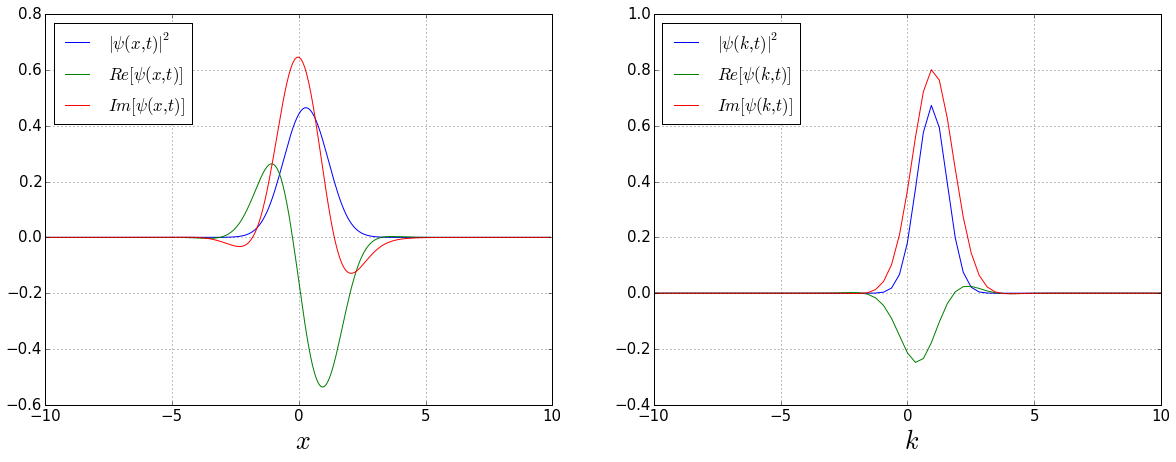

In [47]:

Plot_Psi( Psi_end_x )


### 7. Energy plots
### 7.1 Total energy 

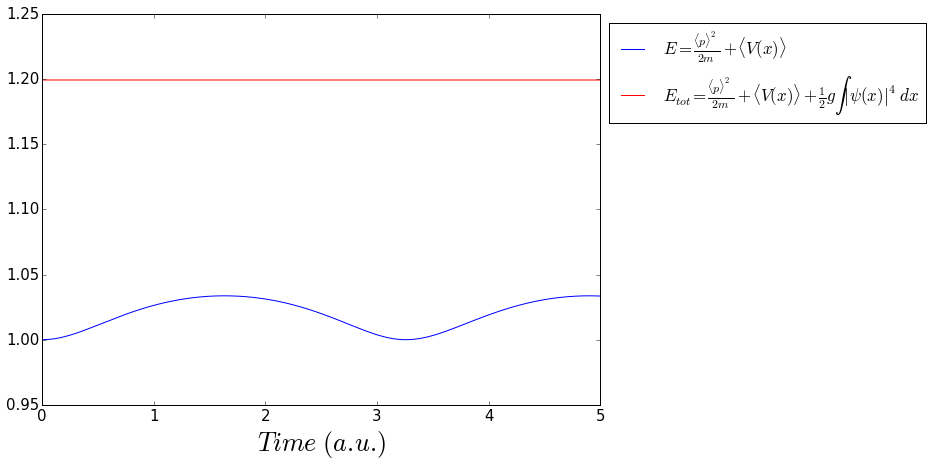

In [51]:

plt.figure(figsize=(10,7))

HamiltonianEnergy = data_Expectation_P2/(2*mass) + data_Expectation_V

Total_energy = HamiltonianEnergy + data_Energy_NL                                                      

plot(  timeRange, np.real( HamiltonianEnergy ) ,'b', label = '$ E= \\frac{\\langle p \\rangle^2}{2m} + \\langle V(x)\\rangle  $'  )   

plot(  timeRange, np.real( Total_energy ) ,'r', label = '$ E_{tot}=\\frac{\\langle p \\rangle^2}{2m} + \\langle V(x)\\rangle + \\frac{1}{2} g \\int \\left | \psi(x) \\right |^4 dx  $' ) 

ylim ([0.95,1.25])

xlabel("$Time \\ (a.u.)$")

legend(loc='upper left', bbox_to_anchor=(1,1))


### 7.2 Plot only the nonlinear energy contribution 

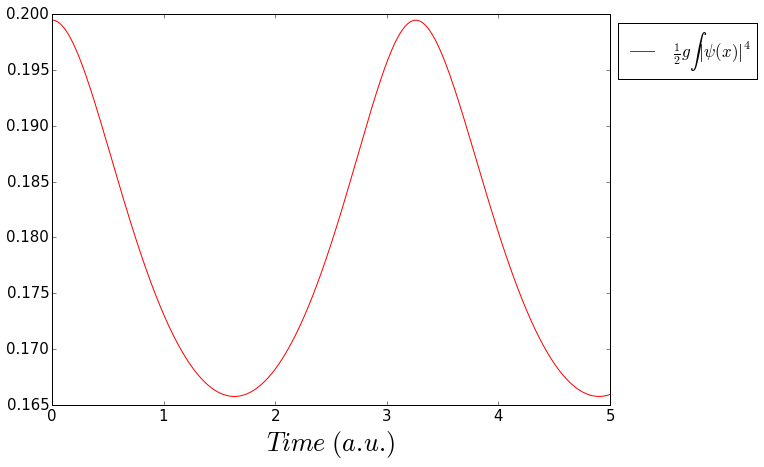

In [52]:

plt.figure(figsize=(10,7))               

plot(  timeRange, np.real( data_Energy_NL ) ,'r', label = '$ \\frac{1}{2} g \\int \\left | \psi(x) \\right |^4 $'  )

#ylim ([0.18, 0.181])

xlabel("$Time \\ (a.u.)$")

legend(loc='upper left', bbox_to_anchor=(1,1))


### 8. Average values plots

In [63]:
# 1 st:

data_Expectation_dXdt = np.gradient(data_Expectation_X,dt) 

data_Expectation_P_mass = np.array( data_Expectation_P )/mass

# 2 nd:

data_Expectation_dPdt =np.gradient(data_Expectation_P,dt)

# 3 rd:

data_Expectation_dX2dt = np.gradient(data_Expectation_X2,dt)

data_Expectation_XP_PX_m = ( np.array(data_Expectation_XP) +  np.array(data_Expectation_PX) )/mass  

# 4 th: 

data_Expectation_dP2dt = np.gradient(data_Expectation_P2,dt)

data_Expectation_pdVdx_dVdxp = -1* ( np.array(data_Expectation_PdVdX) + \
                                np.array(data_Expectation_dVdX_P + 
                                data_Expectation_PdVdX_NL + data_Expectation_dVdX_P_NL) )

# Virial:

data_Expectation_d_PX_XP_dt = np.array(np.gradient(data_Expectation_XP,dt))+ np.array(np.gradient(data_Expectation_PX,dt))

data_Expectation_virial = 2*np.array(data_Expectation_P2)/mass -2*np.array(data_Expectation_XdVdX + data_Expectation_XdVdX_NL)

# Uncertainty Principle

data_Expectation_sigmaX_sigmaP = np.sqrt(np.array(data_Expectation_X2).real \
                                         
 - np.array(data_Expectation_X).real**2) * np.sqrt(np.array(data_Expectation_P2).real  - np.array(data_Expectation_P).real**2)


Ehrenfest's theorems: 
    
$$ \frac{d \langle x \rangle }{dt}=\frac{\langle p\rangle}{m}  $$

$$ \frac{d \langle p \rangle}{dt} = -\langle U'(x) \rangle $$

$$ \frac{d \langle x^2 \rangle}{dt} = \frac{1}{m}\langle x p  +  p x \rangle $$

$$ \frac{d \langle p^2 \rangle }{dt} =  - \langle pU'(x) + U'(x)p \rangle $$

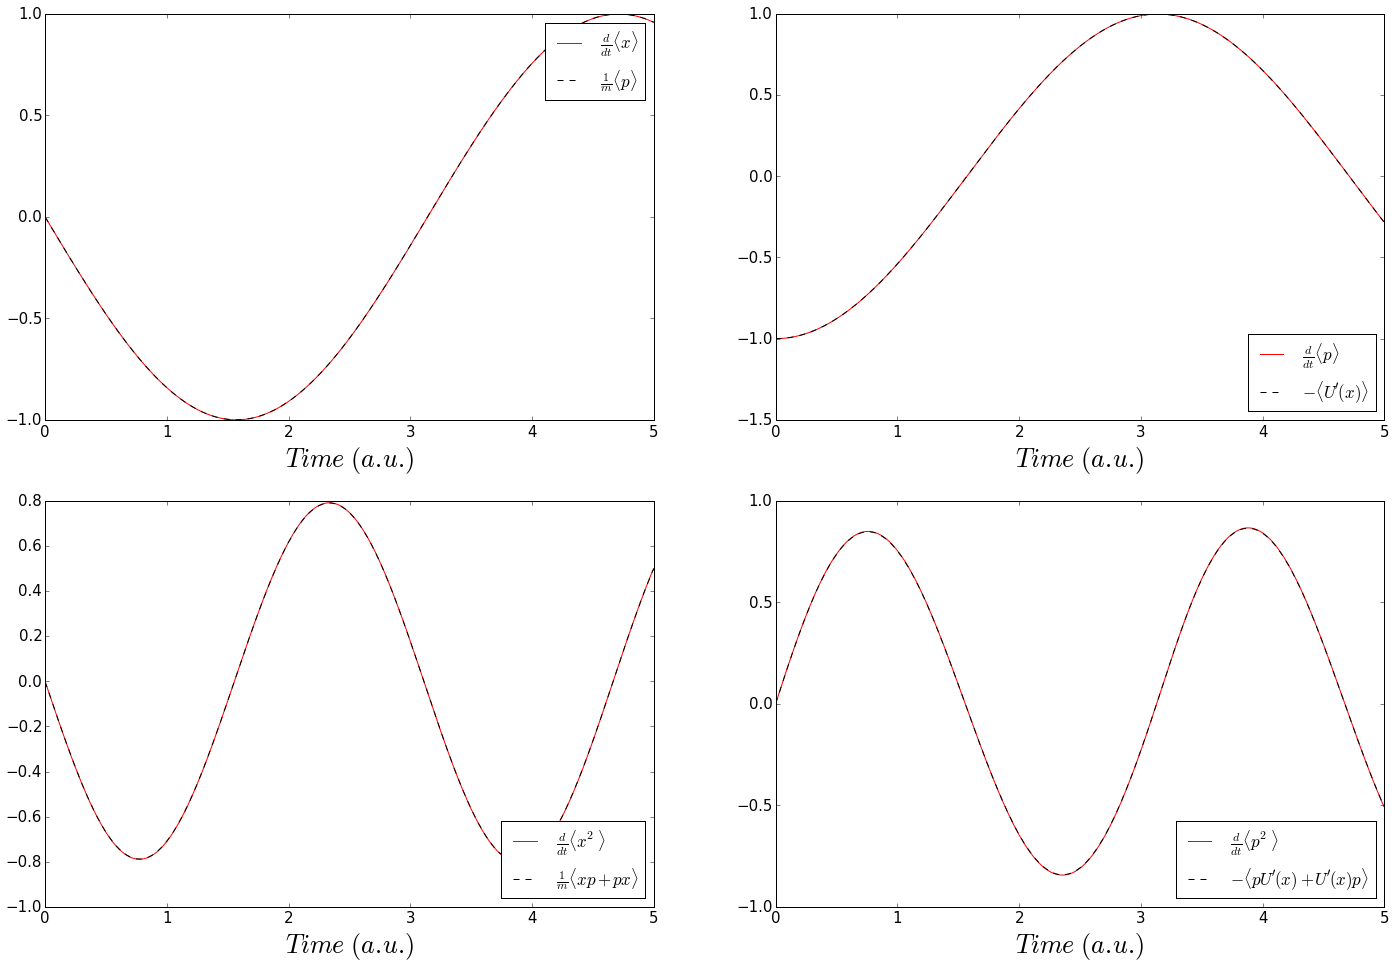

In [64]:

plt.figure(figsize=(24,16))

ax1 = plt.subplot(221)

plt.plot(  timeRange, np.real( data_Expectation_dXdt ), 'r',label = '$ \\frac{d}{dt} \\langle x \\rangle $'  )

plt.plot(  timeRange, np.real( data_Expectation_P_mass ) ,'k--', label = '$ \\frac{1}{m} \\langle p \\rangle $'  )

plt.xlabel("$Time \\ (a.u.)$")

plt.legend(loc = "upper right")


ax2 = plt.subplot(222)

plt.plot(timeRange, np.real(data_Expectation_dPdt ) ,'r'   , label = '$ \\frac{d}{dt} \\langle p \\rangle $' )

plt.plot(timeRange, np.real(data_Expectation_F+ data_Expectation_F_NL) , 'k--',label = "$ -\\langle  U'(x) \\rangle $" )

plt.xlabel("$Time \\ (a.u.)$")

plt.legend(loc = "lower right")

ax3 = plt.subplot(223)

plt.plot(timeRange, np.real(data_Expectation_dX2dt) ,'r',label = '$ \\frac{d}{dt} \\langle x^2 \\rangle $' )

plt.plot(timeRange, np.real( data_Expectation_XP_PX_m ) ,'k--',label = '$ \\frac{1}{m} \\langle xp   + px \\rangle $' )

plt.xlabel("$Time \\ (a.u.)$")

plt.legend(loc = "lower right")

ax4 = plt.subplot(224)

plt.plot( timeRange,np.real(data_Expectation_dP2dt),'r',label = '$ \\frac{d}{dt} \\langle p^2 \\rangle $' )

plt.plot(timeRange, np.real(data_Expectation_pdVdx_dVdxp),'k--',label = "$ -\\langle pU'(x) + U'(x)p \\rangle $" )

plt.xlabel("$Time \\ (a.u.)$")

plt.legend(loc = "lower right")


Virial theorem :
$$ \frac{d }{dt}\langle x p + p x  \rangle  =  \frac{ \\2 \langle p^2 \rangle }{m} - 2 \langle x V'(x) \rangle  $$
Uncertainty principle:
$$  \sigma_x \sigma_p  \geqslant   0.5 $$

Min sigmaXsigmaP : 0.5


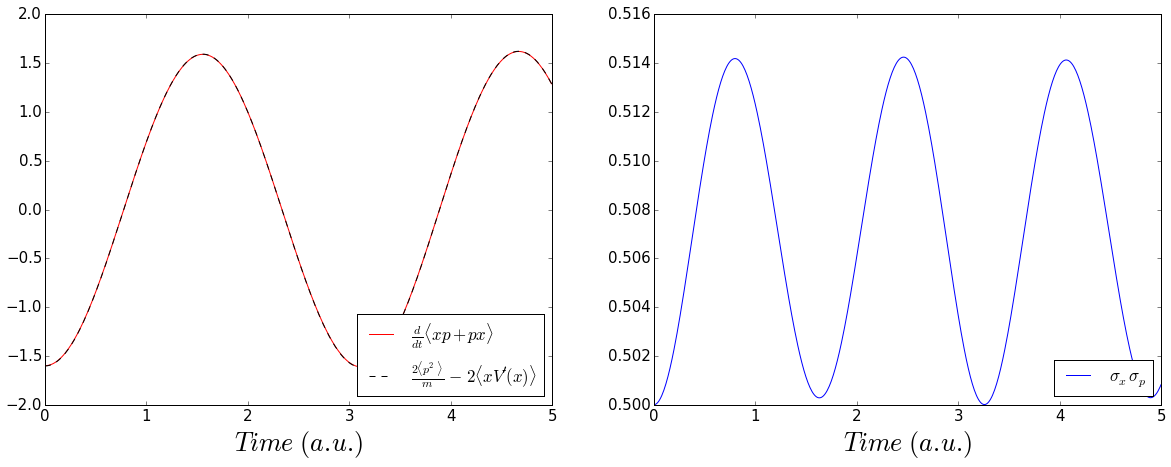

In [65]:
plt.figure(figsize=(20,7))

ax1 = plt.subplot(121)

plt.plot(timeRange, np.real(data_Expectation_d_PX_XP_dt),'r',label = '$ \\frac{d}{dt} \\langle xp + px \\rangle $' )

plt.plot(timeRange, np.real(data_Expectation_virial),'k--',
         label = "$ \\frac{ 2\\langle p^2 \\rangle}{m} \\ - \\ 2 \\langle x V'(x) \\rangle $" )

plt.xlabel("$Time \\ (a.u.)$")

plt.legend(loc = "lower right")

ax2 = plt.subplot(122)

plt.plot( timeRange, data_Expectation_sigmaX_sigmaP.real, label = '$ \sigma_x \sigma_p $')

plt.xlabel("$Time \\ (a.u.)$")

plt.legend(loc = "lower right")

print "Min sigmaXsigmaP :" ,np.min(data_Expectation_sigmaX_sigmaP.real)
